### Projet UE Informatique L3 Physique : Laly Boyer, Klara Piotrowska

# **Relativité Générale - Étude du mouvement d'une étoile autour d'un trou noir de Schwarzschild**

# **Table des matières**

# ! Mettre à jour la table des matières et mettre au propre

## [I. Introduction](#introduction)

### [I/1. Objectifs](#objectifs-principaux)

## [II. Études des géodésiques en 2D sur une surface courbe](#2-étude-des-géodésiques-en-2d-sur-une-surface-courbe)
### [II/1. Les outils mathématiques de la relativité générale](#1-les-outils-mathématiques-de-la-relativité-générale)
### [II/2. implémentation dans le code](#2-implémentation-dans-le-code)
### [II/3. Études des trajectoires stellaires autour du trou noir](#3-études-des-trajectoires-stellaires-autour-du-trou-noir)


## [III. Mesure des énergies cinétiques et potentiels](#iii-mesure-des-énergies-cinétique-et-potentielle)

## [IV. Effet du redshift gravitationnel](#iv-effet-du-redshift-gravitationnel)

## [V. Comparaison entre Newton et Einstein](#v-comparaison-entre-newton-et-einstein)

## [VI. Conclusion et perspective](#vi-conclusion-et-perspective)

# **Introduction**

Lorsqu'une étoile, une particule ou un photon orbite autour d'un trou noir, des effets relativistes, dus à la métrique singulière des trous noirs, perturbent le modèle newtonien classique.

Ces effets relativistes sont nombreux, incluant la précession des orbites, le redshift gravitationnel et les effets de lentille gravitationnelle, et permettent de comprendre la dynamique autour des trous noirs. Les trajectoires suivies par ces objets correspondent à des géodésiques, qui représentent les chemins les plus courts dans un espace-temps courbé.

Pour les étudier, il est nécessaire de considérer les lois physiques spécifiques aux trous noirs de Schwarzschild et de les exprimer sous forme de fonctions mathématiques. Ces fonctions permettent de modéliser l'évolution temporelle de chaque paramètre de trajectoire.

<!-- <img src="figures/blackhole_image.jpg" alt="image_trou_noir" style="width:20em;display:block; margin:auto;"> -->


### <ins>Objectifs principaux</ins>

- Étudier les géodésiques dans différents contextes physiques.
- Simuler des phénomènes spécifiques à la relativité générale comme le mouvement des planètes, le redshift gravitationnel, et la déviation de la lumière.

Le but de notre projet est de **déterminer** et **analyser** la <ins>trajectoire d’un objet physique</ins> (par ex. une étoile ou un photon) <ins>autour d’un trou noir de Schwarzschild</ins>.

<!-- <div class="alert alert-block alert-info">
<b>Définition:</b> Trou noir de Schwarzschild : trou noir de charge électrique et de moment cinétique nul.
</div> -->

Dans un premier temps, nous chercherons à représenter les différents types de trajectoire dans un plan 2D.Pour cela, nous aborderons les outils mathématiques de la relativite générale afin d'établir et résoudre numériquement les équations du mouvement dans la métrique de Schwarzschild.

Ensuite, nous étudierons les phénomènes physiques liées aux précession, tel que :
- L'évolution d'énergie d'objet
- Le redshift de la lumière, et
- L'inflexion de la lumière émise. 


# II. Étude des géodésiques en 2D

Nous commencerons par décrire les lois physiques dictant l'espace-temps autour d'un trou noir de Schwarzschild. Pour cela, nous décrirons les outils mathématiques nécessaires.
<!-- 
<ins>Description physique</ins> :

Description de la géodésique pour un trou noir de Schwarzschild
(Une surface courbe sert d'analogie simplifiée de l'espace-temps.)

<ins>Code associé</ins> :

- Fonction de calcul des géodésiques en 2D :

    - Explication de la fonction geodesics et odeint

- Paramètres : coordonnées initiales, vecteurs vitesse, temps.

- Résultat : trajectoire de la particule ou du rayon lumineux.

- Comparaison avec des géodésiques connues (cercle maximal sur une sphère).

<ins>Lien avec la réalité physique</ins> :

Analogie entre les géodésiques sur une surface courbe et les trajectoires dans l'espace-temps courbé. -->


## **1. Les outils mathématiques de la relativité générale**

### 1.1 Métrique

Afin de procéder à la résolution numérique d’un problème physique, nous devons d’abord spécifier les équations de mouvement dans l’espace en question. Ici, on veut effectuer une simulation dans l’espace définie par la __métrique de Schwarzschild__ (en coordonnées sphériques).

*Cette métrique décrit le champ gravitationnel au voisinage externe d'un corps isolé, à symétrie sphérique, statique (sans rotation), non chargé et entouré de vide.*

L'intervalle s'écrit alors :

$$ds^2=-\left(1-\frac{2GM}{c^2r}\right)c^2dt^2+\left(1-\frac{2GM}{c^2r}\right)^{^{-1}}dr^2+r^2\left(d\theta^2 +sin(\theta )d\varphi ^2\right)$$

Afin de simplifier les calculs, nous choisisons d'utiliser les unités géométriques $G=c=1$. Il faudra néanmoins effectuer les substitutions $M \to \frac{MG}{c^2}$ et $dt \to cdt$ dans le cas d'une application numérique, par exemple pour le calcul du redshift.

Puisqu’on se place dans un plan défini par $\theta$ constant et égale à $\frac{\pi}{2}$, on peut simplifier l’expression de l'intervalle $ds^2$ par :

$$\boxed{ds^2=-\left(1-\frac{2M}{r}\right)dt^2+\left(1-\frac{2M}{r}\right)^{^{-1}}dr^2+r^2d\varphi^2}$$

Pour simuler numériquement un tel espace, nous avons d’abord besoin d’établir les équations
géodésiques, qui vont définir le chemin le plus court entre deux points de l’espace. Pour cela, nous allons résoudre les équations d’Euler Lagrange associées au système.


### 1.2 Equations d’Euler Lagrange


#### 1.2.1 Définition des équations

Nous avons donc défini l'expression de l'intervalle de notre espace. Nous devons maintenant établir les équations du mouvement permettant de simuler un tel espace. Ces équations vont correspondent à des géodésiques, définissant le chemin le plus court entre deux points de l’espace.  

Par définition les équations d’EL s’obtiennent en calculant les dérivés par rapport au coordonnes generalisees et par rapport au temps propre $\tau$.

Le temps $t$ est juste une des coordonnées de problème, donc ne joue pas le rôle particulier dans les dérivés. 

L’intervalle $ds$ (qui prend toujours le même valeur numérique pour une particule, il est invariant) et $\tau$ le temps propre sont liées par la relation $-c^2\times d\tau^2=ds^2$.


On résout les équations d’Euler-Lagrange: 
$$\frac{d}{d\tau }\left(\frac{\partial \mathcal {L}}{\partial \dot{q_{i}}}\right)=\frac{\partial \mathcal {L}}{\partial{q_{i}}}$$

avec $q_{i}$ les coordonées généralisées {$t, r, \varphi$}, soit

$$

\frac{d}{d\tau }\left(\frac{\partial \mathcal {L}}{\partial \dot{t}}\right)=\frac{\partial \mathcal {L}}{\partial{t}}
\qquad

\frac{d}{d\tau }\left(\frac{\partial \mathcal {L}}{\partial \dot{r}}\right)=\frac{\partial \mathcal {L}}{\partial{r}}
\qquad

\frac{d}{d\tau }\left(\frac{\partial \mathcal {L}}{\partial \dot{\varphi}}\right)=\frac{\partial \mathcal {L}}{\partial{\varphi}}


$$

Dans le cadre de la relativité générale, la dérivée temporelle classique est remplacée par la dérivée par rapport à $\tau$, car le temps $t$ est une des coordonnées généralisées du problème. $\tau$ est alors le temps propre au sens de la relativité restreinte que dans le cas où on se place dans le référentiel liée à la particule, donc où $dr=d\varphi=0$. 

Le lagrangien est défini comme: 

$$\begin{align*}\mathcal {L} &= -\frac{1}{2}g_{\mu \nu }\frac{dx^{\mu }}{d\tau }\frac{dx^{\nu  }}{d\tau } \\      \Leftrightarrow \mathcal {L} &=  \frac{1}{2}\left(1 - \frac{2M}{r}\right) \dot{t}^2 - \frac{1}{2} \left(1 - \frac{2M}{r}\right)^{-1}\dot{r}^2 - \frac{1}{2} r^2 \dot{\varphi}^2\end{align*}$$ 

 
avec les vitesses :

$$\dfrac{dt}{d\tau }=\dot{t} \qquad \dfrac{d\varphi}{d\tau }=\dot{\varphi} \qquad \dfrac{dr}{d\tau }=\dot{r}\quad (1)$$



#### 1.2.2 Résolution
/# Revoir cette partie le formatage est bizarre

On obtient alors :

+ $t$ et $\varphi$ :


Comme $t$ et $\varphi$ sont des **variables cycliques**, elles donnent les constantes de mouvement $E$ et $L$ :  

$$\begin{gather} \boxed{\left(1-\frac{2M}{r}\right)\dot{t} = E}\tag{2} \\
\boxed{r^2\dot{\varphi} = L }\tag{3}\end{gather}$$ 

On interprète $E$ comme l'**énergie totale de la masse**, et $L$ le **moment cinétique**. Ces deux quantités sont alors **conservées**.

+ $r$ :

On obtient l'équation :
$$\frac{d\dot{r}}{d\tau }=-\frac{M}{r^2}\frac{E^2}{(1-\frac{2M}{r})}+\frac{L^2}{r^3}\left({1-\frac{M}{r}}\right)+ \frac{M}{r^2}\frac{1}{({1-\frac{M}{r}})}\dot{r}^2$$  
qui peut se réécrire comme: 
$$\begin{equation}\boxed{\frac{d\dot{r}}{d\tau }=\frac{-2M}{r^2}\mathcal {L}+\frac{L^2}{r^3}\left(1-\frac{3M}{r}\right)}\end{equation}\tag{4}$$


On choisit alors de fixer $ \mathcal {L}=\frac{1}{2}$ dans le cas de mouvement des **particules massives**, et à $\mathcal L = 0$ dans le cas de la **lumière**.  On a donc:

+ Pour la lumière $\left(\mathcal {L}=0\right)$:

 $$\frac{d\dot{r}}{d\tau}=\frac{L^2}{r^3}\left(1-\frac{3M}{r}\right)$$

+ Pour une particule massive $\left(\mathcal {L}=\frac{1}{2}\right)$: 

$$\frac{d\dot{r}}{d\tau}=\frac{-M}{r^2}+\frac{L^2}{r^3}\left(1-\frac{3M}{r}\right)$$

### 1.3 Résolution numérique


Nous avons ainsi établi les équations différentielles qui déterminent le mouvement dans l’espace; il nous est donc possible de **simuler la trajectoire d'objets célestes pour différentes conditions initiales**, à l'aide des modules `numpy`, `scipy` et `matplotlib`. 

Pour cela, nous utiliserons les **équations géodésiques** obtenus grâce au lagrangien, ainsi que les **équations de conservation** $L$ et $E$ afin d'incrémenter les variables $(r,\:\varphi,\:t,\:\dot r)$. 

Pour résoudre ces équations différentielles, nous utiliserons la fonction `odeint` du module `scipy`. 

#### Explication de la fonction `odeint`

La fonction `odeint` permet d'intégrer un système d'équation différentiel ordinaire.

Elle prends en argument le système d'équations différentielles des geodésiques, et les conditions initiales de la simulation. La solution (le trajectoire) est alors unique.

Elle renvoie les solutions de l'évolution du temps $t$, du rayon $r$, de l'angle $\varphi$ et de la vitesse $\dot r$ dans le référentiel du temps propre $\tau$.

<div class="alert alert-block alert-success"> 
À finir hehe
</div>


Après avoir résolu le système, il sera possible de convertir les coordonnées sphériques en coordonnées cartésiennes et tracer la trajectoire dans le plan 2D.

En faisant varier les différents paramètres (masse $M$, position initial $\vec r_0$ ou vitesse initiale $\dot{\vec{r_0}}$,...), on pourrait dans un premier temps chercher à établir des trajectoires elliptiques, mouvement du périhélie, les orbites stables et instables. Puis, on pourrait également étudier le comportement de la lumière proche de l'horizon des événements (effet de lentille, décalage vers le rouge...). 
<!-- La phrase "on pourrait dans un premier temps chercher à établir des trajectoires elliptiques, mouvement du périhélie" est un peu floue, il faudrait la reformuler -->


#### Conditions initiales

Les conditions initiales peuvent être définies de deux manières : soit dans le référentiel d’un observateur distant en utilisant le temps t, soit en utilisant les quantités exprimées par rapport au temps propre $\tau$. Ce choix est délicat : en relativité générale, des observateurs situés à différents endroits perçoivent des événements différemment (non seulement en termes de décalage spatial). 



+ ##### Conditions initiales dans le référentiel d’un observateur distant

On suppose que les conditions initiales données en input $(r_0,\: \varphi_0,\: V_{r_0},\: L_{0})$  sont définies dans le référentiel d’un observateur distant. La représentation graphique du mouvement n’a de sens que dans ce référentiel, car, par définition, l’objet est immobile dans son référentiel propre.


Les expressions de la vitesse radiale et du moment angulaire L utilisées dans la fonction `odeint` ont définies à partir des dérivées par rapport au temps propre $\tau$ ( $r^2\frac{d\varphi}{d\tau }=L$ et $\frac{dr}{d\tau }=\dot{r}$). Ces quantités ne correspondent donc pas à celles définies dans le référentiel d’un observateur distant. Puisque le mouvement est représenté dans ce dernier référentiel, il est plus logique de définir les conditions initiales par rapport à t et de remonter ensuite aux quantités exprimées en fonction de $\tau$.

On peut retrouver les vitesses facilement grâce aux relations :
 
 $$\begin{align*} \frac{dr}{d\tau}\frac{d\tau}{dt } = \frac{dr}{dt }    \Leftrightarrow  \frac{dr}{d\tau}=V_{r_0}\dot{t}, \\ \frac{d\varphi}{d\tau}\frac{d\tau}{dt }=\frac{d\varphi}{dt }  \Leftrightarrow  \frac{d\varphi}{d\tau}=V_{\varphi_0}\dot{t} \end{align*}$$ 

Ainsi, on obtient :

 $$\begin{align*} L_{\tau}=r^2V_{\varphi_0}\dot{t}=L_{0}\dot{t} \end{align*}$$ 


Il reste à définir $\dot{t}$: 

- Pour une particule massive (cas $\mathcal L=\frac{1}{2}$) :
<!-- %%% par déduction c'est bien ça normalement (pitié que ce soit ça) -->
$$ \mathcal 1=\left[\left(1-\frac{2M}{r_0}\right)-\left(1-\frac{2M}{r_0}\right)^{-1}V_{r_0}^2-r^2V_{\varphi _0}^2\right]\dot{t}^2 $$


Ce qui donne :
\begin{align*}
    &\dot{t}=\left(\left(1-\frac{2M}{r_0}\right)-\left(1-\frac{2M}{r_0}\right)^{-1}V_{r_0}^2-\frac{L_{0}}{r_{0}^2}\right)^{\frac{1}{2}}
\end{align*}

$\dot{t}$ etant un nombre réel, la quantité sous la racine doit être positive. Certaines valeurs de $r_0, V_{r_0} et L_{0}$ sont donc interdit. Pour simplifier on considere que $L_{0}=0$. On obtient alors une condition sur $V_{r_0}$ (en reintroduisant le facteur c et G) : 

\begin{align*}
    \left(1-\frac{2MG}{c^2r_0}\right)c^2-\left(1-\frac{2MG}{c^2r_0}\right)^{-1}V_{r_0}^2>0 \Leftrightarrow 
    \left(1-\frac{2MG}{c^2r_0}\right)c>V_{r_0}   \tag{5}
\end{align*}

On remarque qu’à proximité du rayon de Schwarzschild ($\frac{2MG}{c^2r_0}$->1), la vitesse apparente $V_{r_0}$ tend vers 0.  Pour un observateur distant, l’objet semble ralentir et s’arrêter au rayon de Schwarzschild, sans jamais le franchir.

Ci-dessous, une représentation de l’évolution du rapport $\frac{dt}{d\tau}$ pour un rayon r fixe. Pour une vitesse $V_{r0}$ assez ellevee on atteigne la limite $V_{r_0}=\left(1-\frac{2MG}{c^2r_0}\right)c$ . Cela signifie qu’une vitesse supérieure n’est pas autorisée à cette distance du rayon de Schwarzschild.



![SegmentLocal](dt_dtau_graphe.png)

+ #### Conditions initiales faisant intervenir le temps propre
À ce stade, on pourrait se contenter de définir les conditions initiales dans le référentiel distant, en utilisant t, avant de les transformer en quantités dépendant de $\tau$, ce qui permet de les injecter dans les équations différentielles exprimées en fonction de $\tau$. Cette approche pose des difficultés dans certaines applications, notamment pour la recherche des orbites stables et instables.

Un critère (développé dans la section suivante) permet de définir le rayon des orbites stables en fonction de la masse `M` et du moment cinétique $L$. On pourrait, dans un premier temps, déterminer les rayons de ces orbites en fonction de $L_{\tau}$, puis calculer le moment cinétique dans le référentiel distant à l’aide de : $L_{0}=\frac{L_{\tau}}{\dot{t}}$ .  Cependant, dans ce cas, les rayons des orbites stables obtenus ne correspondent plus aux mêmes configurations physiques, et l’on aboutit à des orbites d’un autre type.

Il est donc nécessaire de calculer le rayon de l’orbite stable pour une valeur donnée de L, puis de représenter le mouvement en fonction de cette même valeur de L. Cela implique de spécifier directement les conditions initiales qui dépendent de $\tau$ et non de t, avant de représenter le mouvement dans un référentiel distant en utilisant les quantités exprimées en fonction de $\tau$.

Cette approche garantit la cohérence, mais elle ne respecte plus les restrictions imposées par l’équation (5). Par conséquent, il devient possible de représenter des situations qui n’ont pas d’existence physique réelle.


#### Système différentiel

Au final, on obtient à l'entrée: $(r_0,\varphi_0,\dot r_0, \dot \varphi_0)$. On peut exprimer le système différentielle par 4 relation d'incrémentation à utiliser dans `odeint` : 

\begin{align*}
&\frac{dt}{d\tau}=E\left(1-\frac{2M}{r}\right)^{-1}&\to\text{increment } t\\
&\frac{dr}{d\tau}=\dot r&\to\text{increment } r\\
&\frac{d\varphi}{d\tau}=\frac{L}{r^2}&\to\text{increment }\varphi\\
&\frac{d\dot r}{d\tau}=-\frac{M}{r^2}+\frac{L^2}{r^3}\left(1-\frac{3M}{r}\right)&\to\text{increment } \dot r
\end{align*}



## **2. Implémentation dans le code**

Nous avons ainsi établi les équations différentielles qui gouvernent le mouvement, avec lesquelles nous pouvons simuler les trajectoires des objets pour différentes conditions initiales. 

On commence par importer les modules nécessaires. 

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.optimize import * # ? -> Nécessaire ?
import sys

On definit une fonction `geodesics` prise en argument par `odeint`, correspondant au système d'équation différentielles de notre trajectoire. 



In [2]:
def geodesics(y, tau, L, E, M):

    t0, r, phi, r_dot= y  # y porte le valeurs de temps, rayon, phi, vitesse radiale (derivee par rapport a tau)
    dt_dtau = E / (1 - 2 * M / r) # Incrémentation du temps
    dr_dtau = r_dot # Incrémentation de la vitesse radiale
    dphi_dtau = L / r**2 # Incrémentation de la vitesse selon phi
    drdot_dtau = -(M / r**2) + (L**2 / r**3) - (3 * M * L**2) / r**4 # Incrémentation l'accélération radiale 
    
    return [dt_dtau, dr_dtau, dphi_dtau, drdot_dtau]



On peut alors définir nos conditions initiales (on choisit de définir directement les quantités faisant intervenir $\tau$).

On calcules les constantes de mouvement, energie $E$ et moment cinetique $L$. On peut normaliser la masse à 1 ; dans ce cas, le rayon est également sans unité. Compte tenu du choix précédent d’unités, on devrait en réalité remplacer

$$M \text{ [sans unites]} \to \frac{M_\text{vrai}G}{c^2} \:[L]$$
  et $$r \text{[sans unites]} -> r*\frac{M_\text{vrai}G}{c^2}[L] $$


In [3]:
r = 3.1 # rayon initial
v_r = 0 # initialisation de la vitesse radiale (dr_dtau)
t0 = 0
phi0 = 0
M = 1

L = 9*9*0.05 # initaialisation de moment cinetique (r^2*d_phi/d_tau)
E = np.sqrt((1 - 2 * M / r) * (1 + L**2 / r**2)) # calcule d'energie totale

y0 = [t0, r, phi0, v_r] 

tau = np.linspace(0, 100, 10000) # défini l'intervalle de temps choisi pour la simulation

# ! Constant uniquement pour orbite circulaire -- Qui est constant??

sol = odeint(geodesics, y0, tau, args=(L, E, M,))
sol_t0, sol_r, sol_phi, sol_r_dot = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

C:\Users\klara\AppData\Local\Temp\ipykernel_8164\2342097309.py:16: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(geodesics, y0, tau, args=(L, E, M,))


#### Note sur les unités de $r$ et $t$

En considérant la masse du Soleil $M_\odot=2\cdot10^{30}$ kg, on réexprimer l'unite du rayon $r$ et du temps $t$ :

$$
\begin{gather}
r=r_\odot=\frac{M_\odot G}{c^2}=1.48 \text{ km}\\

t=t_\odot=\frac{r_\odot}{c}=4.94 \:\mu\text{s}
\end{gather}
$$



# **3. Études des trajectoires stellaires autour du trou noir**

### 3.1 L'expression du potentiel
Dans le cas général, le potentiel s'écrit :

$U = \left(\frac{2M}{r}-1\right)\left(-\mathcal L -\frac{1}{2}\frac{L^2}{r^2}\right)\\ \Leftrightarrow 
U  = -\frac{2M}{r}\mathcal L + \mathcal L -\frac{ML^2}{r^3} + \frac{1}{2}\frac{L^2}{r^2}$

Pour une particule massive, cela peut se réécrire (à une constante près) : 

$U  = -\frac{2M}{r} -\frac{ML^2}{r^3} + \frac{1}{2}\frac{L^2}{r^2}$

On peut identifier les différents termes dans cette expression et les associer aux forces connues.

Ainsi, le terme $-\frac{2M}{r}$ est le terme du potentiel gravitationnel newtonien. Le terme répulsif $\frac{1}{2}\frac{L^2}{r^2}$ correspond à la force centrifuge.

C'est le terme $-\frac{ML^2}{r^3}$ caractéristique de la relativité générale, qui provient de la courbure de l'espace-temps. À courte distance (r petit), cette force devient significative et modifie les orbites par rapport à celles prévues par la mécanique classique. C'est ainsi que l'anomalie de la précession de Mercure a été expliquée en 1859 (le potentiel propre à la relativité générale induit un écart de position par rapport aux prédictions newtoniennes).




### 3.2 Cas d'une particule massive : $\mathcal L = \frac{1}{2}$

Pour le cas d'une étoile, nous considérons le modèle d'une "particule" massive, avec $\mathcal L = \frac{1}{2}$

Pour ce modèle, l'expression du potentiel s'écrit :

$$\begin{align*}
U & = -\frac{2M}{r}\mathcal L + \mathcal L -\frac{ML^2}{r^3} + \frac{1}{2}\frac{L^2}{r^2}\\
U & = \frac{1}{2}\left(1-\frac{2M}{r}\right)\left(1 + \frac{L^2}{r^2}\right)\\
\end{align*}
$$

On cherche alors les solutions des racines de la dérivée du potentielle, afin de connaître les rayons d'orbite circulaire, soit

$$
\frac{dU}{dr}=0\iff \frac{M}{r^2}-\frac{L^2}{r^3}+\frac{3ML^2}{r^4}=0\\
\iff Mr^2-rL^2+3ML^2=0
$$

On résoud alors les racines de ce polynôme de degré 2 :

$$
\Delta = L^2(L^2-12M^2)\\
\boxed{r_\pm = \frac{L^2\pm \sqrt{\Delta}}{2M}}\text{ si $L\geq \sqrt{12}M$, sinon pas de solution}
$$

On a alors deux cas :

- $L \geq \sqrt{12}M$ : Deux orbites circulaires de rayon $r_\pm = \dfrac{L^2\pm \sqrt{\Delta}}{2M}$

- $L < \sqrt{12}M$ : Pas de racine $\to$ aucune orbite circulaire

Nous commencerons par étudier le premier cas.


#### 3.2.1 Cas $L \geq \sqrt{12}M$

Graphons l'évolution de l'énergie potentielle en fonction du rayon pour les valeurs $M = 3$ et $L = 1.2\times \sqrt{12}M$ :

<img src="ep_particule_mass.png" alt="a" width="40%">


<!-- On peut voir que l'étoile possède deux rayons stable, un méta-stable proche du trou noir de rayon $r_- \in \:]3M,6M[$ 

$r_\pm = \frac{L^2\pm \sqrt{\Delta}}{2M}$ -->

À l'aide du schéma, on repère 4 situations possibles :

- $r < r_-$
    - La particule chute à l’intérieur du trou noir sans pouvoir s’en échapper
- $r = r_-$
    - Orbite stable (aussi circulaire si $v_r=0$)
- $r \in ]r_-,r_+[$
    - Orbite stable  
- $r = r_+$
    - Orbite stable (aussi circulaire si $v_r=0$)
- $r > r_+$
    - Oscillation autour du trou noir durant son orbite mais sans jamais pouvoir tomber dedans ni s’en échapper
- $r=(r_-)^+$ : la trajectoire va sembler s’éloigner du trou noir, mais réalise en réalité juste une orbite très très grande au vu du son énergie potentielle élevé






#### 3.2.2 Cas $L < \sqrt{12}M$

- $L < \sqrt{12}M$ : Pas de racine $\to$ aucune orbite circulaire

On graphe l'expression du potentielle résultant : 


<img src="ep_L_inf_M.png" alt="b" width="42.5%">

Ainsi, il n'existe ni d'orbite circulaire ni d'orbite stable dans cette situation. Si le moment cinétique $L$ est trop faible, alors l'étoile (ou la particule) tombera forcément dans le trou noir.

On peut alors tester notre code pour les différentes valeurs particulières de $r$

In [4]:
###################################
### Valeurs initiales à imposer ###
###################################

tau = np.linspace(0, 100, 1000) # défini l'intervalle de temps choisi pour la simulation
L = 9*9*0.05 # On choisit arbitrairement la valeur du moment cinétique
M = 1 # M en unité de masse solaire M_\odot = 2e30

#############################################
### Recherche des valeurs d'orbite stable ###
#############################################

Lagr = 1/2 # Choix du cas particule massive ou photon (Lagr=0)

if Lagr == 1/2:
    if L >= (12)**(1/2)*M:
        r_moins=((L**2-np.sqrt(L**4-12*(M**2)*L**2))/2/M) # rayon stable le plus proche de l'étoile
        r_plus=((L**2+np.sqrt(L**4-12*(M**2)*L**2))/2/M) # rayon stable le plus éloigné de l'étoile
        print(f"Orbites stables : {r_moins}, {r_plus}")
    else:
        print("Pas de racine") # cela signifie que l'étoile tombera forcément dans le trou noir

elif Lagr == 0:
    orb_stable = 3*M
    print(f"Orbite stable pour r = {orb_stable}")

Orbites stables : 3.952367610182651, 12.450132389817348


### Exemples de differantes trajectoires

Ici, nous présentons les représentations 2D des trajectoires pour les quatres types de rayons. Le code de notre simulation est affiché ci-dessous. Cependant, en raison de la qualité réduite des représentations dans Jupyter Notebook, il est préférable de montrer les GIF générés à l'aide du script Python

+ $r < r_-$ : La chute de la particule dans le trou noir. La dernière partie de la trajectoire semble droite, mais ce n'est pas le cas en réalité. En effet, cela est dû à un pas d'animation trop grand par rapport à la vitesse acquise par la particule. En réalité, on considérerait que la particule atteint le trou noir en franchissant le rayon de Schwarzschild (ici $R_s = 2$). Dans notre modèle, le trou noir est représenté comme un objet ponctuel


![SegmentLocal](t_r_moins.gif)

- $r = r_-$ et $r = r_+$ : orbite stable circulaire


![SegmentLocal](t2_r_moins.gif)

- $r = r_- \in ]3M,6M[$ : orbite stable, trajectoire forme des rosaces

![SegmentLocal](t_r_inter.gif)

+ anomalie

Le code utilisé: 

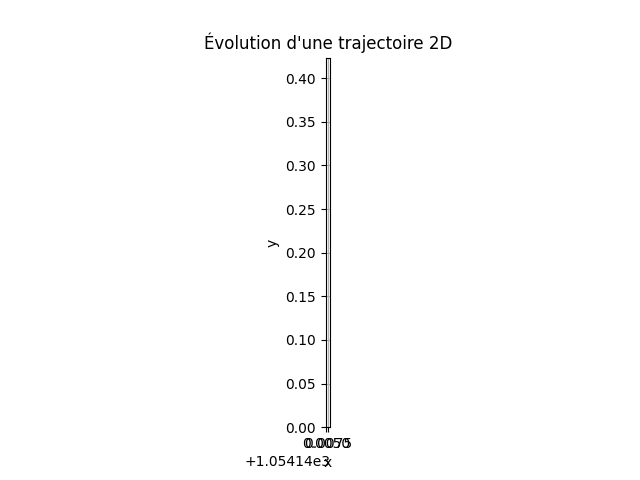

In [ ]:

###############################################
### Initialisation des conditions initiales ###
###############################################
r = r_moins # rayon initial
v_r = 0 # initialisation de la vitesse radiale (dr_dtau)
t0 = 0
phi0 = 0
M = 1

L = 9*9*0.05 # initaialisation de moment cinetique (r^2*d_phi/d_tau)
E = np.sqrt((1 - 2 * M / r) * (1 + L**2 / r**2)) # calcule d'energie totale

y0 = [t0, r, phi0, v_r] 

#############################################
### Résolution des équa diff du mouvement ###
#############################################

sol = odeint(geodesics, y0, tau, args=(L, E, M,))
sol_t0, sol_r, sol_phi, sol_r_dot = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

####################################################################
### Projection des solutions polaires en coordonnées cartésienne ###
####################################################################

x_sol =  sol_r * np.cos(sol_phi)
y_sol =  sol_r * np.sin(sol_phi)


# Création de la figure et des axes
fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Évolution d'une trajectoire 2D")

# Délimitation des axes pour s'assurer d'observer correctement la trajectoire
ax1.set_xlim(np.min(x_sol)*1.05, np.max(x_sol)*1.05)
ax1.set_ylim(np.min(y_sol)*1.05, np.max(y_sol)*1.05)

# Initialisation de l'objet graphique
line, = ax1.plot([], [], lw=2, label="Trajectoire")
point, = ax1.plot([], [], 'ro')  # Point pour la position actuelle


# Dessiner le trou noir comme un point noir au centre
ax1.plot(0, 0, 'o', color='black', markersize=8, label='Trou noir')  # Marqueur noir au centre
#ax1.legend()

# Fonction d'initialisation
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(frame):
    # Mise à jour des trajectoires
    line.set_data(x_sol[:frame], y_sol[:frame])  # Trajectoie
    point.set_data([x_sol[frame]], [y_sol[frame]])  # Point représentant la particule / l'étoile
    return line, point

show_animation = True

if show_animation:
    ani = FuncAnimation(fig, update, frames=len(sol_t0), init_func=init, blit=True, interval=20)
    plt.gca().set_aspect('equal')
    plt.grid(True)

else:
    fig, ax2 = plt.subplots()
    ax2.plot(0, 0, 'o', color='black', markersize=8, label='Trou noir')  # Marqueur noir au centre
    plt.plot(x_sol, y_sol)
    ax2.set_aspect(aspect="equal")
    plt.grid(True)
    plt.show()


### Cas de la lumière : $\mathcal L = 0$

L'expression du potentiel s'écrit :

$$\begin{align*}
U & = -\frac{2M}{r}\mathcal L + \mathcal L -\frac{ML^2}{r^3} + \frac{1}{2}\frac{L^2}{r^2}\\
U & = \frac{L^2}{2r^2}\left(1-\frac{2M}{r}\right)\\
\end{align*}
$$

On cherche alors les solutions des racines de la dérivée du potentielle, afin de connaître les rayons d'orbite stable, soit

$$
\frac{dU}{dr}=0\iff \frac{L^2}{r^3}(\frac{3M}{r}-1)=0\\

$$

La seule orbite stable $r=3M$ est alors independante de L. Il s’agit du sphere de photon: c'est la seule surface (ici: un circle) où le photon emis peut suivre une orbite stable, et donc reste autour du trou noir sans s’en échapper ni tomber dedans. Pour tout rayon < 3M le photon doit necessairemnt tomber dans le trou noir. Pour r > 3M le photon s'echappe de l’attraction du trou noir et s’éloigner à l’infini.

<img src="potentiel_lum.png" width="40%">


peut etre dire qu'on arrive pas a faire la lentille?



<ins>Description physique</ins> :

- Les rayons lumineux suivent aussi des géodésiques.
- Déviation de la lumière par une masse centrale : lentille gravitationnelle.
- Capture ou orbite photonique proche du trou noir.

<ins>Code associé</ins> :

- Fonction de calcul de trajectoire des rayons lumineux :
- Conditions initiales : angle d'incidence, distance minimale au centre.
- Variables : masse du trou noir, rayon de Schwarzschild.
- Simulation de la déviation et des orbites photoniques.

![test](potentiel_lum.png)

<ins>Lien avec la réalité physique</ins> :

- Observation expérimentale des lentilles gravitationnelles dans l'univers (par exemple, Einstein Cross).
- Effet de capture des rayons lumineux au-delà d’un certain rayon critique.

![SegmentLocal](t_photon.gif)

# IV. Effet du redshift gravitationnel

## 1. Calcul du redshift


### Effet Doppler  - Version alternative?

Les photons émis par un corps en mouvement subissent un décalage Doppler. Il s'agit d'un phénomène bien établi dans le cadre de la mécanique classique. Le rapport entre les longueurs d'onde émises et reçues s'écrit alors :

$$\frac{\lambda_{recu}}{\lambda_{emis}}=\sqrt{\frac{1+\frac{v}{c}}{1-\frac{v}{c}}}$$

qui peut être exprimé en $z=\frac{\lambda_{recu}-\lambda_{emis}}{\lambda_{emis}}$, qui représente le décalage relatif :

$$ 1 + z = \sqrt{\frac{1+\frac{v}{c}}{1-\frac{v}{c}}}$$

Nous proposons de calculer $z$ pour la lumière émise par le corps en mouvement. Pour simplifier les calculs, l'observateur sera placé à une distance infinie ( x=0 et y<0), ce qui nous permet de négliger la vitesse selon une de directions (ici: selon x).e qui nous permettra de négliger la vitesse dans une des directions (ici, selon $x$). Nous allons calculer la vitesse à partir des solutions obtenues pour les coordonnées de position $x$ et $y$, en utilisant la définition de la vitesse instantanée : $$\frac{dy}{d\tau}=\frac{y_{i+1}-y_{i}}{\tau_{i+1}-\tau_{i}}$$.

Le bénéfice de cette approche est que l'effet du mouvement relativiste est déjà pris en compte, puisque les solutions de position en $x$ et $y$ sont obtenues à partir des équations des géodésiques. Cependant, le trajet de la lumière émise vers l'observateur sera également influencé par la courbure de l'espace-temps, ce qui soulève la question de savoir s'il sera nécessaire d'ajouter un terme correctif.


Ci-dessous, une trajectoire est affichée avec la valeur du décalage indiquée dans le coin de l'image. Cette valeur correspond au décalage de la lumière émise à la position en temps réel. Les valeurs numériques ne sont pas réalistes, car nous utilisons la convention $G=c=1$, mais le sens de variation semble conforme à la réalité physique.


![SegmentLocal](decalage_rg.gif)


Le code associé (à utiliser depuis fichier python):


b


C:\Users\klara\AppData\Local\Temp\ipykernel_8164\2271330616.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  line, = ax.plot(x_sol[0:1], y_sol[0:1], 'b-',color="blue", lw=0.5)    # trajectoire
C:\Users\klara\AppData\Local\Temp\ipykernel_8164\2271330616.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  planet, = ax.plot(x_sol[0], y_sol[0], 'ro', color="red",markersize=3)  # position initiale


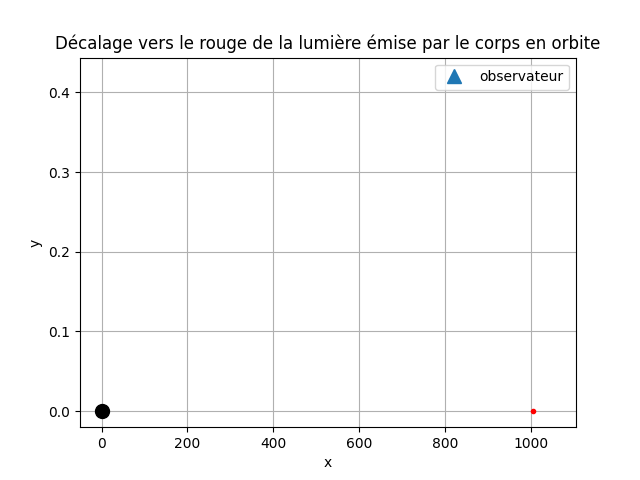

In [7]:
def redshift_doppler(y_sol, frame):

    try:
        vy=y_sol[frame+1]-y_sol[frame]
    except:
        vy=0

    z=((1+vy)/(1-vy))**(1/2)-1
 
    return z


fig, ax = plt.subplots()

if np.max(x_sol)>10*abs(np.min(x_sol)) and abs(np.min(y_sol))>np.max(y_sol)*10:
    print("a")
    ax.set_xlim(np.min(x_sol)-0.1*np.max(x_sol), np.max(x_sol)+0.1*abs(np.min(x_sol)))
    ax.set_ylim(np.min(y_sol)-0.1*np.max(y_sol), np.max(y_sol)+0.1*abs(np.min(y_sol)))
elif np.min(x_sol)>0 and np.min(y_sol)>=0:
    print("b")
    ax.set_xlim(-0.05*np.max(x_sol), np.max(x_sol)+0.1*np.max(x_sol))
    ax.set_ylim(-0.05*np.max(y_sol), np.max(y_sol)+0.1*np.max(y_sol))
elif np.min(x_sol)<0:
    print("c")
    ax.set_xlim(np.min(x_sol)-0.1*np.max(x_sol), np.max(x_sol)+0.1*np.max(x_sol))
    ax.set_ylim(np.min(y_sol)-0.1*np.max(y_sol), np.max(y_sol)+0.1*np.max(y_sol))

ax.plot(0, 0, 'ko', markersize=10) # trou noire
ax.plot(0, -3.5, '^', markersize=10, label="observateur")

line, = ax.plot(x_sol[0:1], y_sol[0:1], 'b-',color="blue", lw=0.5)    # trajectoire
planet, = ax.plot(x_sol[0], y_sol[0], 'ro', color="red",markersize=3)  # position initiale

ax.legend(loc='upper right')#, bbox_to_anchor=(0, 0.5), ncol=1)


def animate(frame):
   
    line.set_data(x_sol[:frame], y_sol[:frame])
    planet.set_data(x_sol[frame], y_sol[frame])
    z_current=redshift_doppler(y_sol, frame)
    text_redshift.set_text(f'Redshift: {z_current:.2e}') 
 
    return line, planet, text_redshift



skip_factor = 4 
text_redshift = ax.text(0.95, 0.05, '', transform=ax.transAxes, fontsize=10, 
                        verticalalignment='bottom', horizontalalignment='right')

ani = FuncAnimation(fig, animate, frames=range(0, len(x_sol), skip_factor), blit=True, interval=1)

plt.xlabel('x')
plt.ylabel('y')
plt.title ("Décalage vers le rouge de la lumière émise par le corps en orbite")#("Trajectoire d'un photon autour de trou noire.")
plt.grid(True)
plt.show()




### Redshift gravitationnel

In the theory of general relativity, there is time dilation within a gravitational well. This is known as the gravitational redshift or Einstein Shift.[45] The theoretical derivation of this effect follows from the Schwarzschild solution of the Einstein equations which yields the following formula for redshift associated with a photon traveling in the gravitational field of an uncharged, nonrotating, spherically symmetric mass


$$ 1 + z = \frac{1}{1-\sqrt{\dfrac{2GM}{rc^2}}}  = \frac{1}{1-\sqrt{\dfrac{R_S}{r}}} $$
avec $R_S= \dfrac{2GM}{c^2}$ le rayon de Schwarzschild

Comme on considère ici notre $M$ un facteur de $M_0=2\cdot 10^{30}$ la masse du soleil, et $G=c=1$, on calcule dans notre code le redshift tel que

$$ z = \frac{1}{1-\sqrt{\dfrac{2M}{r}}} - 1 $$


In [6]:
def redshift(r): # ? Est ce qu'on l'exprime comme décalage relatif ou est ce qu'on laisse les valeurs ?
    """
    Retourne une liste du redshift de la longueur d'onde d'émission au cours du temps
    """
    # G = 6.67 * 1e-11
    # c = 3 * 1e8
    
    # Calcul du redshift gravitationnel
    z = 1/np.sqrt(1 - 2*M/r) - 1
    
    return z

# V. Comparaison entre Newton et Einstein



Dans le cadre classique l'expression du potentiel peut se reecrire en excluant le terme relativiste: 

$U  = -\frac{2M}{r} + \frac{1}{2}\frac{L^2}{r^2}\\$

Les solutions sont donnes par les extrema du potentiel:
$$
\frac{dU}{dr}=0\iff \frac{1}{r^2}(2M-\frac{L^2}{r})=0\\$$

On remarque qu'une orbite stable est toujours définie, indépendamment des conditions initiales, $r=\frac{L^2}{2M}$. C'est une orbite elliptique 
Ci-dessous les comparaison de des orbites newtonienne et relativiste pour deux masses de mêmes conditions initiales. 



![SegmentLocal](newton.gif)

Le code associé (à utiliser depuis fichier python):

In [ ]:
def geodesics_classical(y, tau, L, E, M): # computation de la trajectoire newtonienne classique
    t0, r, phi, r_dot = y
    
    dt_dtau = E / (1 - 2 * M / r)  # Identique
    dr_dtau = r_dot
    dphi_dtau = L / r**2
    drdot_dtau = -(2 * 1/2 * M / r**2) + (L**2 / r**3)  # Pas de terme relativiste ici
    
    return [dt_dtau, dr_dtau, dphi_dtau, drdot_dtau]


solc = odeint(geodesics_classical, y0, tau, args=(L, E, M,))
solc_t0, solc_r, solc_phi, solc_r_dot = solc[:, 0] , solc[:, 1] ,solc[:, 2] ,solc[:, 3] 
x_solc =  solc_r * np.cos(solc_phi)
y_solc =  solc_r * np.sin(solc_phi)

linec, = ax.plot(x_solc[0:1], y_solc[0:1], 'b-',color="red", lw=0.5)    # trajectoire
planetc, = ax.plot(x_solc[0], y_solc[0], 'ro',color="red", markersize=3, label="trajectoire newtonienne")

ax.legend(loc='upper right')#, bbox_to_anchor=(0, 0.5), ncol=1)

def animate(frame):
    
    line.set_data(x_sol[:frame], y_sol[:frame])
    planet.set_data(x_sol[frame], y_sol[frame])
    linec.set_data(x_solc[:frame], y_solc[:frame])
    planetc.set_data(x_solc[frame], y_solc[frame])

    return line, planet,linec ,planetc


ani = FuncAnimation(fig, animate, frames=range(0, len(x_sol), skip_factor), blit=True, interval=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title ("Décalage vers le rouge de la lumière émise par le corps en orbite")#("Trajectoire d'un photon autour de trou noire.")
plt.grid(True)
plt.show()

# VI. Conclusion et perspective

### Conclusion 

<ins>Résumé des phénomènes simulés</ins> :

- Importance de la relativité générale pour expliquer des observations astrophysiques.
- Réussite du projet : mise en évidence des effets principaux (précession, déviation, redshift).

<ins>Idées pour aller plus loin</ins> :

- Étendre les simulations à des configurations plus complexes (trous noirs en rotation).
- Étudier les perturbations (effet de plusieurs masses).
- Approfondir l’analyse des lentilles gravitationnelles dans un contexte cosmologique.

### Bibliographie:
+ Cours relativité générale - notes manuscrites, Frédéric Faure
+ "Introduction à la gravitation". Pierre Brun
+ https://en.wikipedia.org/wiki/Gravitational_redshift#:~:text=In%20physics%20and%20general%20relativity,a%20gravitational%20well%20lose%20energy.
+ https://einstein.stanford.edu/content/relativity/q2473.html
